In [1]:
import pandas as pd
titanic = pd.read_csv('../dataset/titanic3.csv')
df = titanic.copy()
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [2]:
df.info()
# body, boat, cabin, home.dest 제거

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [3]:
df.drop(['body','boat','cabin','home.dest'],axis=1,inplace=True)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,C


In [4]:
df.info()
# 결측값 age, fare, embarked null값 처리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [5]:
df[df['fare'].isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [6]:
group3 = df.groupby('pclass').get_group(3)

In [7]:
farenull = df[(df['pclass']==3)&(df['age'] > 60)&(df['sex']=='male')]
farenull

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
727,3,0,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
782,3,0,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,Q
1068,3,0,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,S
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S
1235,3,0,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S


In [8]:
fn = round(farenull['fare'].mean(),4)
fn

7.3781

In [9]:
df.fare.fillna(fn,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1309 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [10]:
en = df.embarked.value_counts(dropna=True).idxmax()

In [11]:
df[df['embarked'].isna()]
# fare, 티켓 번호 동일한 것 확인

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [12]:
df[(df['fare']>=80)&(df['pclass']==1)&(df['ticket']=='113572')]
# 티켓 번호 동일한 사람 있는 지 확인 -> 없음.

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [13]:
fnd = df[(df['fare']>=80)&(df['pclass']==1)&(df['sex']=='female')&(df['survived']==1)]
fnd.embarked.value_counts()
fnd.embarked.value_counts(dropna=True).idxmax()
# 티켓 번호 제외 다른 조건들과 동일한 승객들 목록을 뽑은 후 가장 많은 embarked 확인 -> C

'C'

In [14]:
df.embarked.fillna('C',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1309 non-null   float64
 9   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [15]:
ndf = df[df['age'].isna()]
ndf

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,S
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,S
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,C
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,S
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,C
...,...,...,...,...,...,...,...,...,...,...
1293,3,0,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,S
1297,3,0,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,S
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,C
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,C


In [16]:
df2 = df.dropna(axis=0)

In [17]:
df3 = df2.drop(['name','ticket'],axis=1)
df3

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.5500,S
2,1,0,female,2.00,1,2,151.5500,S
3,1,0,male,30.00,1,2,151.5500,S
4,1,0,female,25.00,1,2,151.5500,S
...,...,...,...,...,...,...,...,...
1301,3,0,male,45.50,0,0,7.2250,C
1304,3,0,female,14.50,1,0,14.4542,C
1306,3,0,male,26.50,0,0,7.2250,C
1307,3,0,male,27.00,0,0,7.2250,C


In [18]:
df3['family'] = df3['sibsp'] + df3['parch']
df3

,pclass,survived,sex,age,sibsp,parch,fare,embarked,family
0,1,1,female,29.00,0,0,211.3375,S,0
1,1,1,male,0.92,1,2,151.5500,S,3
2,1,0,female,2.00,1,2,151.5500,S,3
3,1,0,male,30.00,1,2,151.5500,S,3
4,1,0,female,25.00,1,2,151.5500,S,3
...,...,...,...,...,...,...,...,...,...
1301,3,0,male,45.50,0,0,7.2250,C,0
1304,3,0,female,14.50,1,0,14.4542,C,1
1306,3,0,male,26.50,0,0,7.2250,C,0
1307,3,0,male,27.00,0,0,7.2250,C,0


In [19]:
df4 = df3.drop(['sibsp','parch'],axis=1)
df4

,pclass,survived,sex,age,fare,embarked,family
0,1,1,female,29.00,211.3375,S,0
1,1,1,male,0.92,151.5500,S,3
2,1,0,female,2.00,151.5500,S,3
3,1,0,male,30.00,151.5500,S,3
4,1,0,female,25.00,151.5500,S,3
...,...,...,...,...,...,...,...
1301,3,0,male,45.50,7.2250,C,0
1304,3,0,female,14.50,14.4542,C,1
1306,3,0,male,26.50,7.2250,C,0
1307,3,0,male,27.00,7.2250,C,0


<AxesSubplot:xlabel='age', ylabel='Count'>

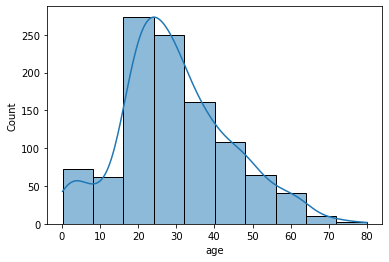

In [20]:
import seaborn as sns
sns.histplot(df4.age,kde=True,bins=10)

<AxesSubplot:xlabel='fare', ylabel='Count'>

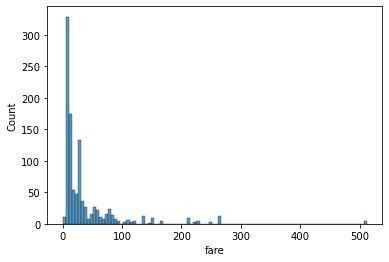

In [21]:
sns.histplot(df4.fare,bins=100)

In [22]:
pd.qcut(df4.fare,5)

0       (51.479, 512.329]
1       (51.479, 512.329]
2       (51.479, 512.329]
3       (51.479, 512.329]
4       (51.479, 512.329]
              ...        
1301      (-0.001, 7.896]
1304         (13.0, 26.0]
1306      (-0.001, 7.896]
1307      (-0.001, 7.896]
1308      (-0.001, 7.896]
Name: fare, Length: 1046, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.896] < (7.896, 13.0] < (13.0, 26.0] < (26.0, 51.479] < (51.479, 512.329]]

In [23]:
def farecat(x):
    cat=''
    if x < 7.896 : cat = 0
    elif x < 13 : cat = 1
    elif x < 26 : cat = 2
    elif x < 51.479 : cat = 3
    else: cat = 4
    return cat
df4['fare_cat'] = df4['fare'].apply(farecat)
df4

,pclass,survived,sex,age,fare,embarked,family,fare_cat
0,1,1,female,29.00,211.3375,S,0,4
1,1,1,male,0.92,151.5500,S,3,4
2,1,0,female,2.00,151.5500,S,3,4
3,1,0,male,30.00,151.5500,S,3,4
4,1,0,female,25.00,151.5500,S,3,4
...,...,...,...,...,...,...,...,...
1301,3,0,male,45.50,7.2250,C,0,0
1304,3,0,female,14.50,14.4542,C,1,2
1306,3,0,male,26.50,7.2250,C,0,0
1307,3,0,male,27.00,7.2250,C,0,0


In [24]:
pd.cut(df4.age,5)

0       (16.136, 32.102]
1       (0.0902, 16.136]
2       (0.0902, 16.136]
3       (16.136, 32.102]
4       (16.136, 32.102]
              ...       
1301    (32.102, 48.068]
1304    (0.0902, 16.136]
1306    (16.136, 32.102]
1307    (16.136, 32.102]
1308    (16.136, 32.102]
Name: age, Length: 1046, dtype: category
Categories (5, interval[float64]): [(0.0902, 16.136] < (16.136, 32.102] < (32.102, 48.068] < (48.068, 64.034] < (64.034, 80.0]]

In [25]:
def agecat(x):
    cat=''
    if x < 16.136 : cat = 0
    elif x < 32.102 : cat = 1
    elif x < 48.068 : cat = 2
    elif x < 64.034 : cat = 3
    else: cat = 4
    return cat
df4['age_cat'] = df4.age.apply(agecat)
df4

,pclass,survived,sex,age,fare,embarked,family,fare_cat,age_cat
0,1,1,female,29.00,211.3375,S,0,4,1
1,1,1,male,0.92,151.5500,S,3,4,0
2,1,0,female,2.00,151.5500,S,3,4,0
3,1,0,male,30.00,151.5500,S,3,4,1
4,1,0,female,25.00,151.5500,S,3,4,1
...,...,...,...,...,...,...,...,...,...
1301,3,0,male,45.50,7.2250,C,0,0,2
1304,3,0,female,14.50,14.4542,C,1,2,0
1306,3,0,male,26.50,7.2250,C,0,0,1
1307,3,0,male,27.00,7.2250,C,0,0,1


In [26]:
df5 = df4.drop(['age','fare'],axis=1)
df5

,pclass,survived,sex,embarked,family,fare_cat,age_cat
0,1,1,female,S,0,4,1
1,1,1,male,S,3,4,0
2,1,0,female,S,3,4,0
3,1,0,male,S,3,4,1
4,1,0,female,S,3,4,1
...,...,...,...,...,...,...,...
1301,3,0,male,C,0,0,2
1304,3,0,female,C,1,2,0
1306,3,0,male,C,0,0,1
1307,3,0,male,C,0,0,1


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
feature = ['sex','embarked']
for i in feature:
    df5[i] = le.fit_transform(df5[i])
df5

,pclass,survived,sex,embarked,family,fare_cat,age_cat
0,1,1,0,2,0,4,1
1,1,1,1,2,3,4,0
2,1,0,0,2,3,4,0
3,1,0,1,2,3,4,1
4,1,0,0,2,3,4,1
...,...,...,...,...,...,...,...
1301,3,0,1,0,0,0,2
1304,3,0,0,0,1,2,0
1306,3,0,1,0,0,0,1
1307,3,0,1,0,0,0,1


In [28]:
df5 = df5.drop('embarked',axis=1)

In [29]:
df6 = df5.drop(['fare_cat','family'],axis=1)

In [30]:
df6

,pclass,survived,sex,age_cat
0,1,1,0,1
1,1,1,1,0
2,1,0,0,0
3,1,0,1,1
4,1,0,0,1
...,...,...,...,...
1301,3,0,1,2
1304,3,0,0,0
1306,3,0,1,1
1307,3,0,1,1


In [33]:

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_t_df = df6['survived'] # 종속변수
X_t_df = df6.drop('survived', axis = 1) # 독립변수

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 5)

print(X_train.shape)
print(X_test.shape)

(836, 3)
(210, 3)


In [34]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print('rf 정확도:{}, lr 정확도:{}'.format(accuracy_rf,accuracy_lr))

rf 정확도:0.87, lr 정확도:0.81
